In [8]:
#DATA CLEANING

In [219]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
originaltrain=pd.read_csv('train.csv', index_col='Id')

In [221]:
originaltest=pd.read_csv('test.csv', index_col='Id')

In [222]:
totaldata=pd.concat([originaltrain, originaltest], axis=0)

In [223]:
pd.set_option('display.max_rows', 90)
pd.isnull(totaldata).sum(axis=0)

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [42]:
totaldata.Street.value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [41]:
totaldata.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [269]:
new=(originaltrain['Condition1']+' and '+originaltrain['Condition2'])
originaltrain['new']=new
new.value_counts() #not enough for fair analysis

In [ ]:
#We see that the set for prediction contains 4 rows of NA in MSZoning
#and 1 row of NA in SaleType, so we have 
#to impute those

#Get rid of Alley, PoolQC, Fence, MiscFeature columns, Lot Frontage

#Get rid of Utilities, Street, RoofMatl, Heating, LowQualFinSF because all 99% of samples 
#have same values

#Get rid of Condition1 and Condition2, basically all data has same condition and a small
#percentage has an additional condition

#Combine Exterior1st and Exterior2nd to make the model more accurate. But first see if they even
#affect price

#MasVnrType impute "None"
#MasVnrArea impute "0"

#Get rid of YearBuilt, because YearRemodAdd includes this if wasn't upgraded

#BsmtQual change NA to nobasement
#BsmtCond change NA to nobasement
#BsmtExposure change NA to nobasement
#Get rid of BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2 because already
#data of total sq footage and condition of basement so these would be redundant

#BsmtUnfSF change to percentage unfinished because that is more interpretable.
#Need 1 value imputed

#check if basement quality (height) has an effect

#impute TotalBsmtSF, it's 1 row

#get rid of 2ndFlrSF and 1stFlrSF because have GrLivArea which includes all sq footage above basement

#keep heatingqc, central air, electrical. but check if they really matter

#impute BsmtFullBath, BsmtHalfBath 2 rows. I guess zero

#BsmtFullBath+FullBath, BsmtHalfBath+HalfBath. Combine these 2. I know from seeing real 
#estate ads that what matter is full vs half, and not whether inbasement or not. and from research


#keep BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd
#need to impute 1 KitchenQual

#Get rid of column Functional bc from plot see its not significant in pricing, and anyway
#far majority of the data is the same level of functional

#keep fireplaces, significant. FireplaceQu get rid of, not significant

#GarageCond replace NA with none

#GarageType replace NA with none
#Get rid of GarageYrBlt, otherwise multicollinearity with YearRemodAdd
#GarageFinish replace NA with none

#get rid of GarageCars bec multicollinearity with GarageArea
#impute 1 Garage Area

#get rid of GarageQual because highly correlated with GarageCond

#get rid of PoolArea, replace PoolQC NA with 0, everything else with one, change
#column to HasPool

#add together WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch
#for newfeature "PorchDecktotalsquarefootage"

#fence replace NA with none

#get rid of MoSold and YrSold, they dont seem to make much of a difference


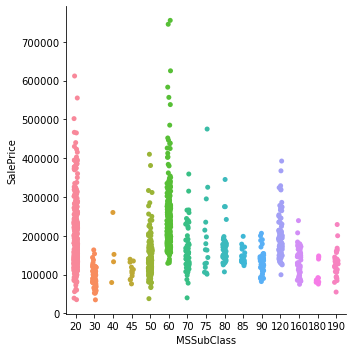

In [446]:
sns.catplot(x='MSSubClass', y='SalePrice', data=originaltrain) #keep

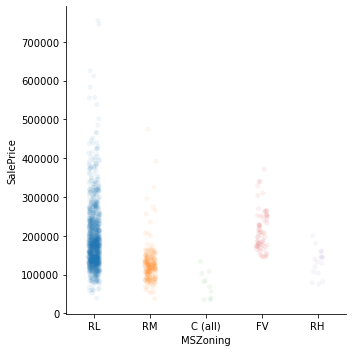

In [504]:
sns.catplot(x='MSZoning', y='SalePrice',data=originaltrain,alpha=.07) #keep

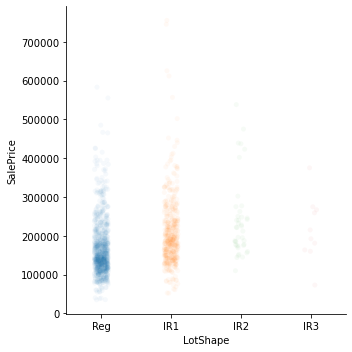

In [463]:
sns.catplot(x='LotShape', y='SalePrice', data=originaltrain,alpha=.04) #keep

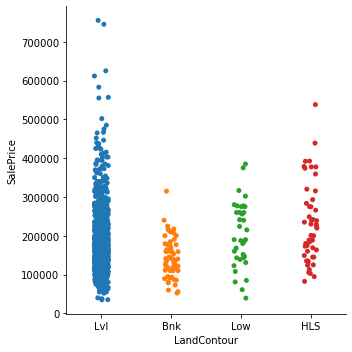

In [467]:
sns.catplot(x='LandContour', y='SalePrice', data=originaltrain) #keep

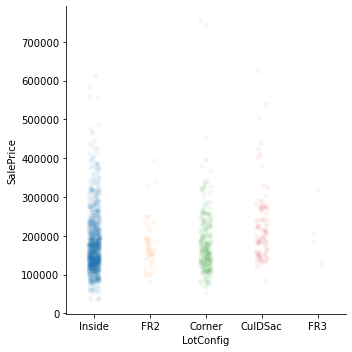

In [470]:
sns.catplot(x='LotConfig', y='SalePrice', data=originaltrain, alpha=.06) #keep

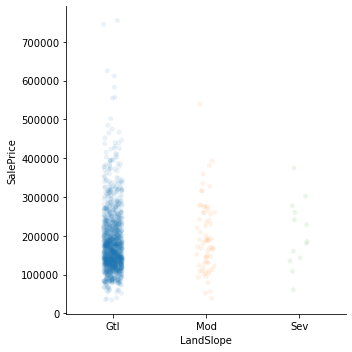

In [473]:
sns.catplot(x='LandSlope', y='SalePrice', data=originaltrain, alpha=.09) #getrid

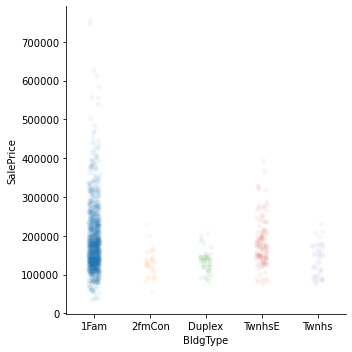

In [488]:
sns.catplot(x='BldgType', y='SalePrice', data=originaltrain, alpha=.06) #keep

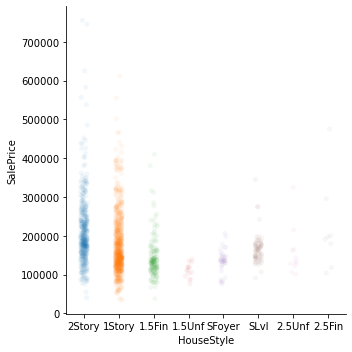

In [487]:
sns.catplot(x='HouseStyle', y='SalePrice', data=originaltrain, alpha=.06) #keep

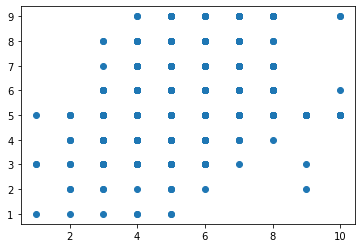

In [51]:
plt.scatter(totaldata.OverallQual, totaldata.OverallCond)
#there is not correlation between OverallQual and OverallCond, so keep them seperate.

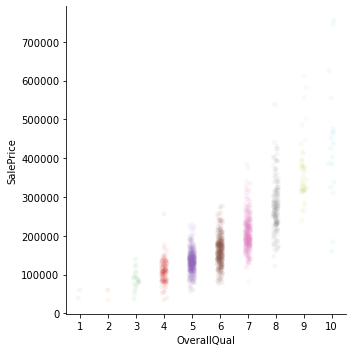

In [506]:
sns.catplot(x='OverallQual', y='SalePrice', data=originaltrain, alpha=.06) #keep

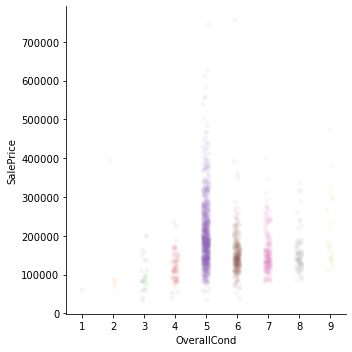

In [507]:
sns.catplot(x='OverallCond', y='SalePrice', data=originaltrain, alpha=.06) #keep

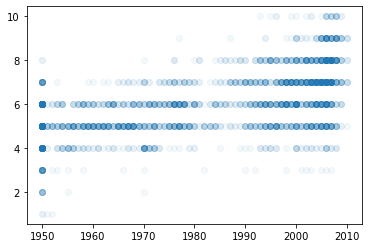

In [512]:
plt.scatter(totaldata.YearRemodAdd, totaldata.OverallQual, alpha=.05) #not significantly correlated

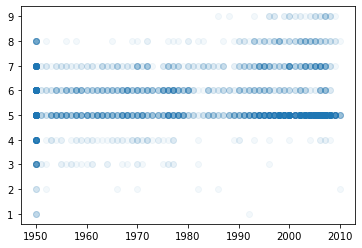

In [513]:
plt.scatter(totaldata.YearRemodAdd, totaldata.OverallCond, alpha=.05) #not significantly correlated

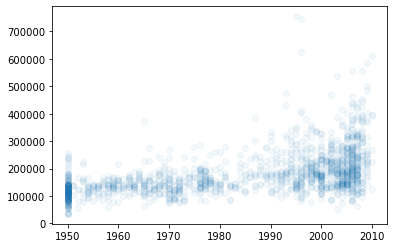

In [508]:
plt.scatter(totaldata.YearRemodAdd, totaldata.SalePrice, alpha=.05)

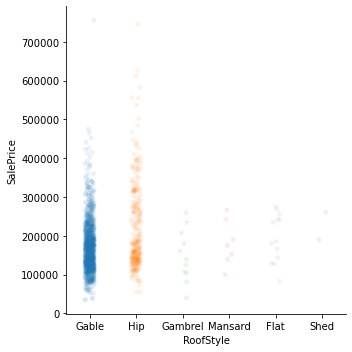

In [490]:
sns.catplot(x='RoofStyle', y='SalePrice', data=originaltrain, alpha=.09) #keep 
#researched, hip more expensive than gable
#just keep hip column, others have too little data

In [520]:
originaltrain['exteriors']=originaltrain.Exterior1st+ originaltrain.Exterior2nd

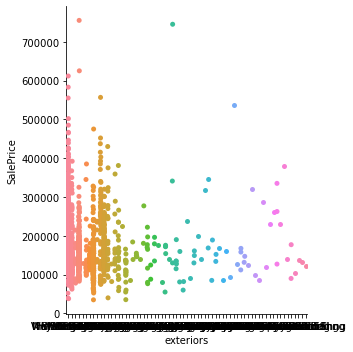

In [521]:
sns.catplot(x='exteriors', y='SalePrice', data=originaltrain) #getrid

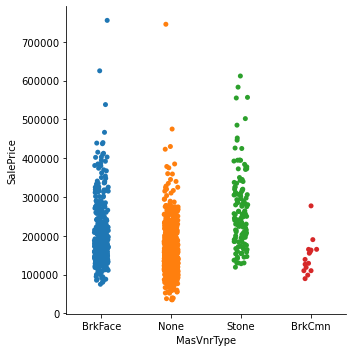

In [522]:
sns.catplot(x='MasVnrType', y='SalePrice', data=originaltrain) #keep

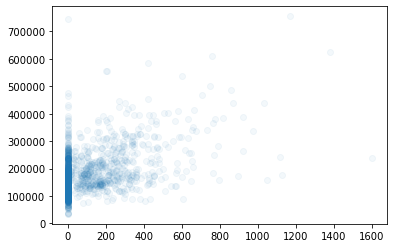

In [523]:
plt.scatter(totaldata.MasVnrArea, totaldata.SalePrice, alpha=.05)

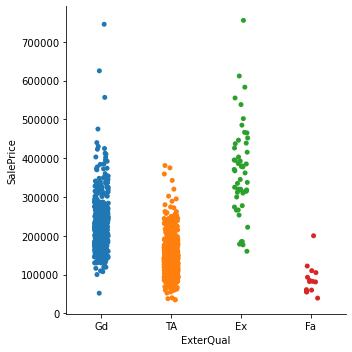

In [524]:
sns.catplot(x='ExterQual', y='SalePrice', data=originaltrain) #keep

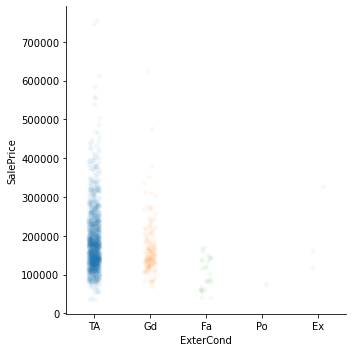

In [526]:
sns.catplot(x='ExterCond', y='SalePrice', data=originaltrain, alpha=.05) #getrid

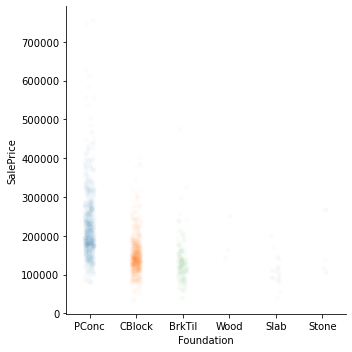

In [124]:
sns.catplot(x='Foundation', y='SalePrice', data=originaltrain, alpha=.02) #keep

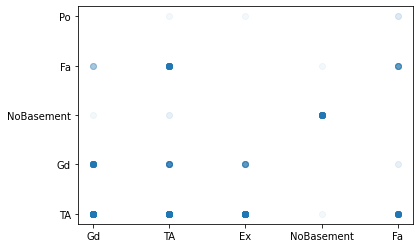

In [186]:
plt.scatter(totaldata.BsmtQual, totaldata.BsmtCond, alpha=.05) #not significantly correlated

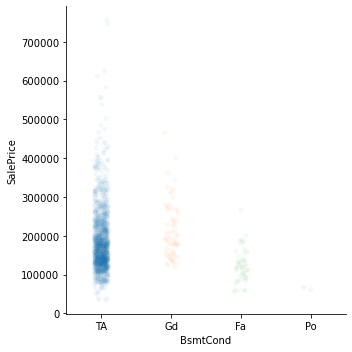

In [131]:
sns.catplot(x='BsmtCond', y='SalePrice', data=originaltrain, alpha=.05)

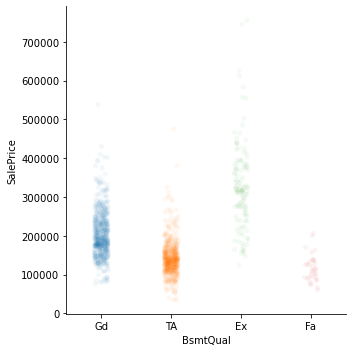

In [130]:
sns.catplot(x='BsmtQual', y='SalePrice', data=originaltrain, alpha=.05)

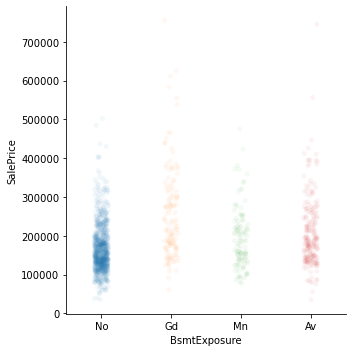

In [129]:
sns.catplot(x='BsmtExposure', y='SalePrice', data=originaltrain, alpha=.05) #getrid

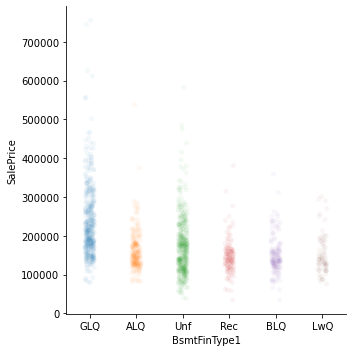

In [531]:
sns.catplot(x='BsmtFinType1', y='SalePrice', data=originaltrain, alpha=.05) #getrid

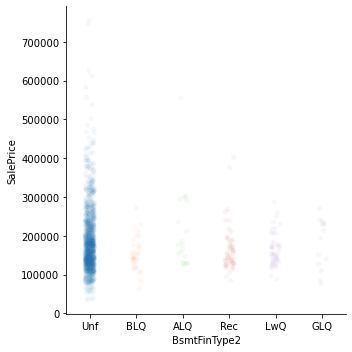

In [532]:
sns.catplot(x='BsmtFinType2', y='SalePrice', data=originaltrain, alpha=.05) #getrid

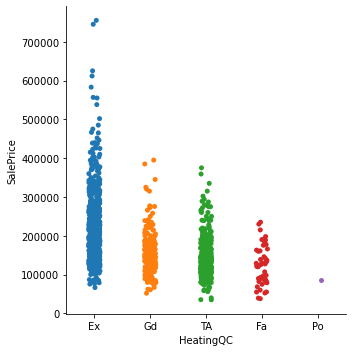

In [133]:
sns.catplot(x='HeatingQC', y='SalePrice', data=originaltrain) #keep

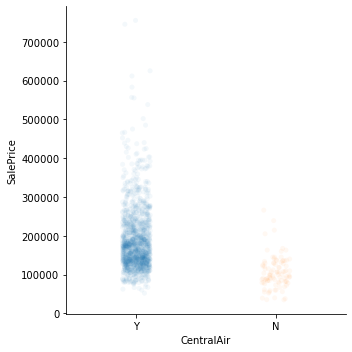

In [134]:
sns.catplot(x='CentralAir', y='SalePrice', data=originaltrain, alpha=.05)

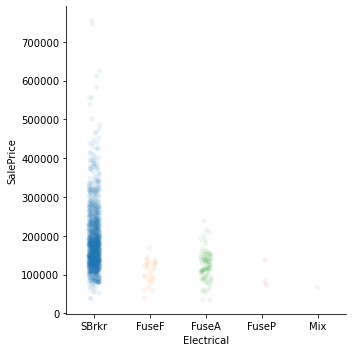

In [137]:
sns.catplot(x='Electrical', y='SalePrice', data=originaltrain, alpha=.08) #getrid

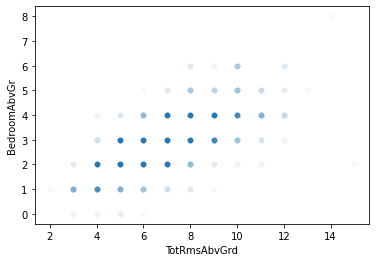

In [595]:
sns.scatterplot(x='TotRmsAbvGrd', y='BedroomAbvGr', data=totaldata, alpha=.04) #correlation so keep
#just bedrooms
#also because already have factor of sq footage

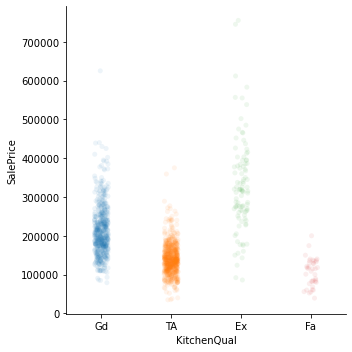

In [538]:
sns.catplot(x='KitchenQual', y='SalePrice', data=originaltrain, alpha=.08) #keep

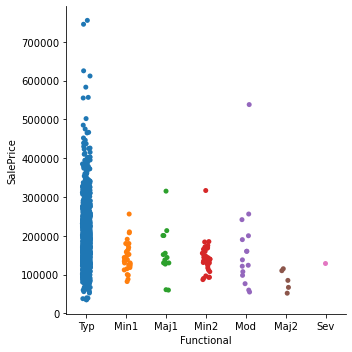

In [73]:
sns.catplot(x='Functional', y='SalePrice', data=originaltrain)

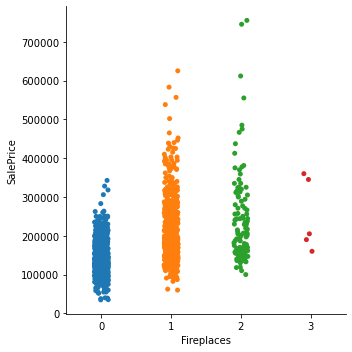

In [545]:
sns.catplot(x='Fireplaces', y='SalePrice', data=originaltrain)

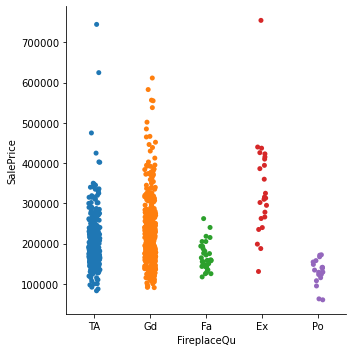

In [549]:
sns.catplot(x='FireplaceQu', y='SalePrice', data=originaltrain)

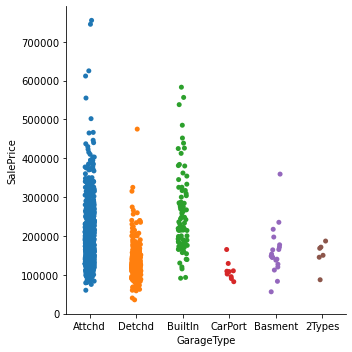

In [550]:
sns.catplot(x='GarageType', y='SalePrice', data=originaltrain)

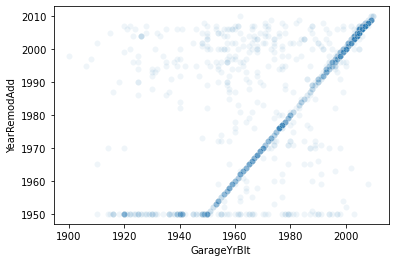

In [596]:
sns.scatterplot(x='GarageYrBlt', y='YearRemodAdd', data=originaltrain, alpha=.07)
#highly correlates with YearRemodAdd so get rid

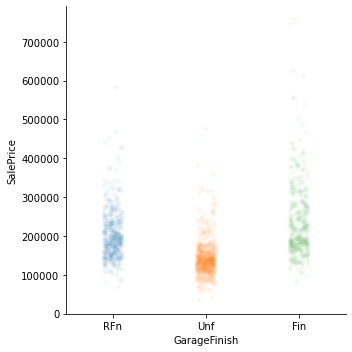

In [556]:
sns.catplot(x='GarageFinish', y='SalePrice', data=originaltrain, alpha=.05)

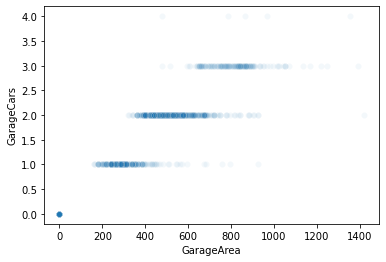

In [559]:
sns.scatterplot(x='GarageArea', y='GarageCars', data=originaltrain, alpha=.05)

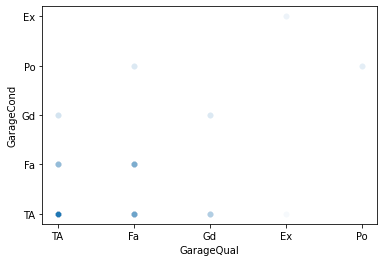

In [563]:
sns.scatterplot(x='GarageQual', y='GarageCond', data=originaltrain, alpha=.04)
#highly correlated, only use one

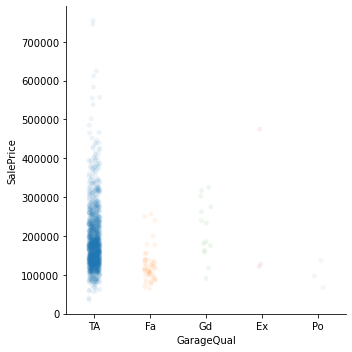

In [569]:
sns.catplot(x='GarageQual', y='SalePrice', data=originaltrain, alpha=.08) #getrid
#2 most popular categories have similar mean price and the rest there aren’t enough 
#observations for it to be fair to use


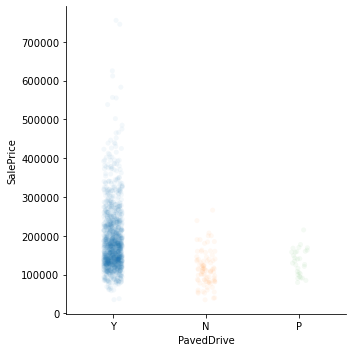

In [585]:
sns.catplot(x='PavedDrive', y='SalePrice', data=originaltrain, alpha=.05) #getrid

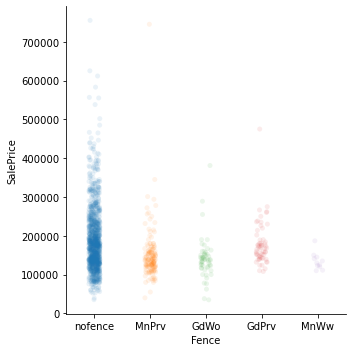

In [150]:
sns.catplot(x='Fence', y='SalePrice', data=originaltrain, alpha=.09) #fence makes no diff, get rid

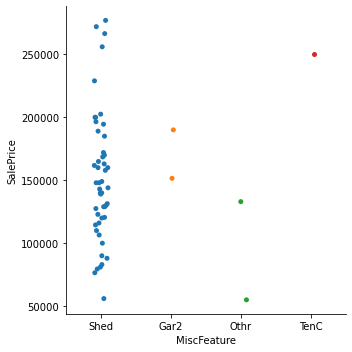

In [154]:
sns.catplot(x='MiscFeature', y='SalePrice', data=originaltrain) #get rid

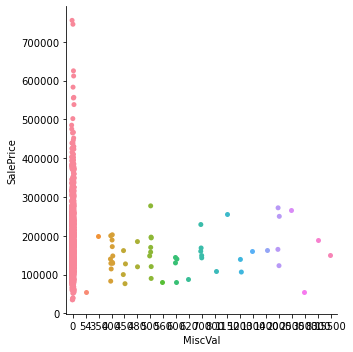

In [153]:
sns.catplot(x='MiscVal', y='SalePrice', data=originaltrain) #get rid

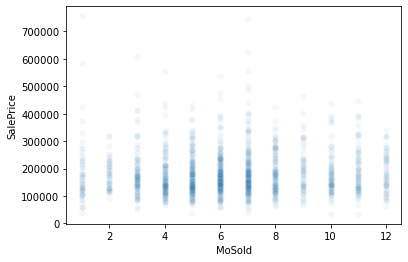

In [586]:
sns.scatterplot(x='MoSold', y='SalePrice', data=originaltrain, alpha=.05)

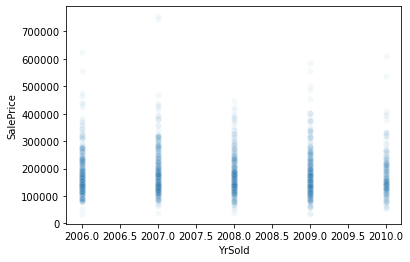

In [587]:
sns.scatterplot(x='YrSold', y='SalePrice', data=originaltrain, alpha=.05)

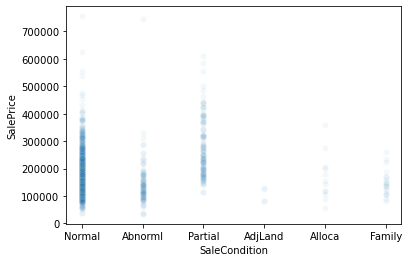

In [588]:
sns.scatterplot(x='SaleCondition', y='SalePrice', data=originaltrain, alpha=.05)

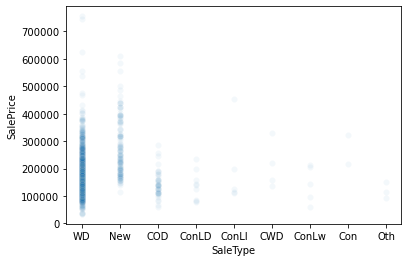

In [589]:
sns.scatterplot(x='SaleType', y='SalePrice', data=originaltrain, alpha=.05)

In [149]:
originaltrain['Fence'] = originaltrain['Fence'].fillna('nofence')


In [ ]:
#Impute Missing Values

In [37]:
for i in list(totaldata.columns):
    print(totaldata[i].value_counts())

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
137.0      1
182.0      1
119.0      1
195.0      1
141.0      1
Name: LotFrontage, Length: 128, dtype: int64
9600     44
7200     43
6000     34
9000     29
10800    25
         ..
12867     1
2628      1
8775      1
13478     1
12292     1
Name: LotArea, Length: 1951, dtype: int64
Pave    2907
Grvl      12
Name: Street, dtype: int64
Grvl    120
Pave     78
Name: Alley, dtype: int64
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
AllPub    2916
NoSeWa       1
Name: Utilities,

In [225]:
#impute mode for these columns
for column in ['MSZoning', 'KitchenQual', 'SaleType']:
    totaldata[column].fillna(totaldata[column].mode()[0], inplace=True)

In [226]:
totaldata['MasVnrType'].fillna('None',inplace=True)

In [227]:
totaldata['MasVnrArea'].fillna(0, inplace=True)

In [228]:
totaldata['BsmtQual'].fillna('NoBasement', inplace=True)
totaldata['BsmtCond'].fillna('NoBasement', inplace=True)

In [229]:
totaldata['TotalBsmtSF'].fillna(0, inplace=True)

In [230]:
totaldata['BsmtFullBath'].fillna(0, inplace=True)
totaldata['BsmtHalfBath'].fillna(0, inplace=True)

In [231]:
totaldata['KitchenQual'].fillna(totaldata['KitchenQual'].mode()[0], inplace=True)

In [232]:
totaldata['GarageType'].fillna('None', inplace=True)

In [233]:
totaldata['GarageFinish'].fillna('None', inplace=True)

In [234]:
totaldata['GarageArea'].fillna(totaldata['GarageArea'].mean(), inplace=True)

In [235]:
totaldata['GarageCond'].fillna('None', inplace=True)

In [236]:
totaldata['PoolQC'].fillna(0, inplace=True)

In [237]:
totaldata['SaleType'].fillna(totaldata['SaleType'].mode()[0], inplace=True)

In [238]:
HasPool=(np.where(totaldata['PoolQC']==0, 0, 1)).reshape(-1,1)

In [240]:
totaldata['HasPool']=HasPool

In [287]:
PropOfBsmtFinished=1-(totaldata['BsmtUnfSF']/totaldata['TotalBsmtSF'])

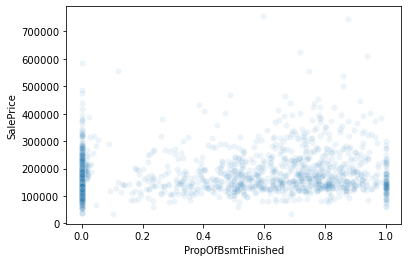

In [537]:
sns.scatterplot(x='PropOfBsmtFinished', y='SalePrice', data=totaldata[:1460], alpha=.08) #getrid

In [286]:
NumFullBath= totaldata['BsmtFullBath']+totaldata['FullBath']
NumHalfBath= totaldata['BsmtHalfBath']+totaldata['HalfBath']

In [288]:
totaldata['PropOfBsmtFinished']=PropOfBsmtFinished
totaldata['NumFullBath']=NumFullBath
totaldata['NumHalfBath']=NumHalfBath

In [321]:
totaldata['PropOfBsmtFinished'].fillna(0, inplace=True)

In [294]:
TotalPorchDeckSF=totaldata['WoodDeckSF']+totaldata['OpenPorchSF']+totaldata['EnclosedPorch']+totaldata['3SsnPorch']+totaldata['ScreenPorch']

In [296]:
totaldata['TotalPorchDeckSF']=TotalPorchDeckSF

In [297]:
totaldata

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool,PropOfBsmtFinished,NumFullBath,NumHalfBath,TotalPorchDeckSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,NaN,NaN,0,2,2008,WD,Normal,208500.0,0,0.824766,3.0,1.0,61
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,181500.0,0,0.774960,2.0,1.0,298
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,NaN,NaN,0,9,2008,WD,Normal,223500.0,0,0.528261,3.0,1.0,42
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,0,0.285714,2.0,0.0,307
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,NaN,NaN,0,12,2008,WD,Normal,250000.0,0,0.572052,3.0,1.0,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,None,NaN,None,0.0,0.0,NaN,None,Y,0,0,0,0,0,0,0,NaN,NaN,0,6,2006,WD,Normal,NaN,0,0.000000,1.0,1.0,0
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,NaN,NaN,0,4,2006,WD,Abnorml,NaN,0,0.461538,1.0,1.0,24
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,Viny

In [322]:
totaldata[['MasVnrType','MasVnrArea','ExterQual','Foundation','BsmtQual','BsmtCond',
          'PropOfBsmtFinished','TotalBsmtSF','HeatingQC','CentralAir','GrLivArea','NumFullBath',
          'NumHalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','Fireplaces','GarageType',
           'GarageFinish','GarageArea','GarageCond','TotalPorchDeckSF','HasPool','SaleType','SaleCondition'
            ]][totaldata[['MasVnrType','MasVnrArea','ExterQual','Foundation','BsmtQual','BsmtCond',
          'PropOfBsmtFinished','TotalBsmtSF','HeatingQC','CentralAir','GrLivArea','NumFullBath',
          'NumHalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','Fireplaces','GarageType',
           'GarageFinish','GarageArea','GarageCond','TotalPorchDeckSF','HasPool','SaleType','SaleCondition'
            ]].isna().any(axis=1)]

,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtCond,PropOfBsmtFinished,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,NumFullBath,NumHalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,GarageCond,TotalPorchDeckSF,HasPool,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
#FindingOutliers

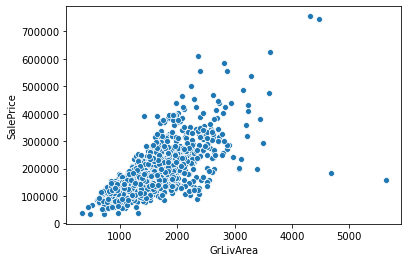

In [652]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=totaldata)

In [655]:
totaldata[totaldata['GrLivArea']>4600]
# RemoveId 524 and 1299

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool,PropOfBsmtFinished,NumFullBath,NumHalfBath,TotalPorchDeckSF,LogSalePrice,SqrtLotArea,SqrtMasVnrArea,SqrtGrLivArea,SqrtTotalBsmtSF,SqrtGarageArea
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,0,NaN,NaN,0,10,2007,New,Partial,184750.0,0,0.720204,4.0,1.0,614,12.126759,200.234862,27.604347,68.381284,56.017854,29.732137
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000.0,1,0.923732,4.0,1.0,506,11.982929,252.758778,28.213472,75.113248,78.166489,37.656341
2550,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,0,NaN,NaN,17000,10,2007,New,Partial,NaN,0,0.787046,3.0,2.0,1030,NaN,198.217053,34.985711,71.379269,71.379269,33.970576


In [ ]:
#Normalize Distribution of Sale Price

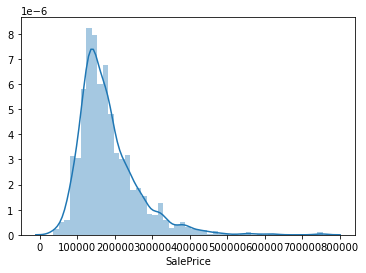

In [341]:
sns.distplot(originaltrain.SalePrice) #skewed right

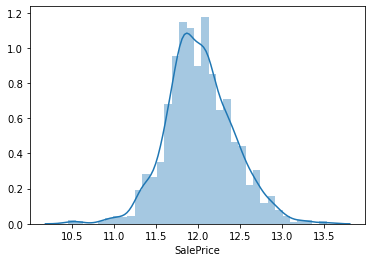

In [344]:
sns.distplot(np.log(originaltrain.SalePrice)) #take the log of the sale price so that its
#normally distributed

In [ ]:
#Maybe normalize features with skewed distributions
#using sqrt because it works best on most and I want it to be a consistent transformation
#between features about square footage

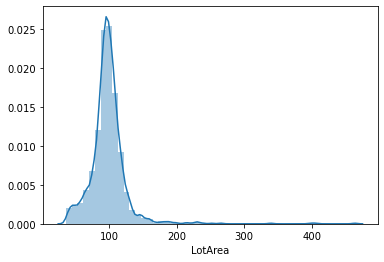

In [658]:
sns.distplot(np.sqrt(originaltrain.LotArea))

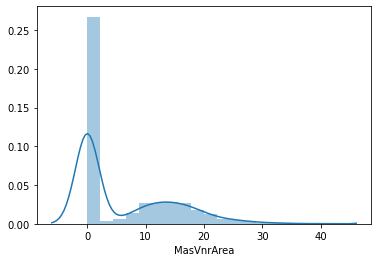

In [659]:
sns.distplot(np.sqrt(originaltrain.MasVnrArea))

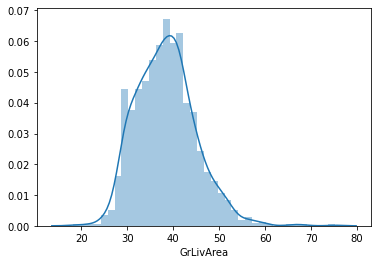

In [661]:
sns.distplot(np.sqrt(originaltrain.GrLivArea))

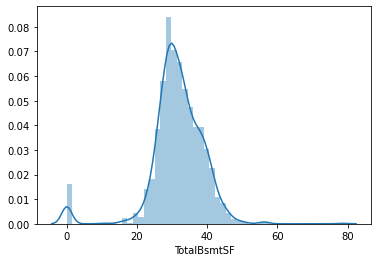

In [662]:
sns.distplot(np.sqrt(originaltrain.TotalBsmtSF))

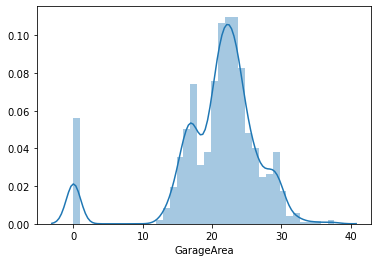

In [663]:
sns.distplot(np.sqrt(originaltrain.GarageArea))

In [639]:
totaldata['LogSalePrice']=np.log(totaldata.SalePrice)
totaldata['SqrtLotArea']=np.sqrt(totaldata.LotArea)
totaldata['SqrtMasVnrArea']=np.sqrt(totaldata.MasVnrArea)
totaldata['SqrtTotalBsmtSF']=np.sqrt(totaldata.TotalBsmtSF)
totaldata['SqrtGrLivArea']=np.sqrt(totaldata.GrLivArea)
totaldata['SqrtGarageArea']=np.sqrt(totaldata.GarageArea)

In [694]:
tdselected=totaldata[['MSSubClass','MSZoning','SqrtLotArea','LotShape','LandContour','LotConfig',
                       'Neighborhood','BldgType','HouseStyle','OverallQual','OverallCond',
                      'YearRemodAdd','RoofStyle','MasVnrType','SqrtMasVnrArea','ExterQual','Foundation',
                      'BsmtQual','BsmtCond','PropOfBsmtFinished','SqrtTotalBsmtSF','HeatingQC','CentralAir',
                      'SqrtGrLivArea','NumFullBath','NumHalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual',
                      'Fireplaces','GarageType','GarageFinish','SqrtGarageArea','TotalPorchDeckSF',
                      'HasPool','SaleType','SaleCondition','LogSalePrice'
            ]]

In [695]:
tdselected

,MSSubClass,MSZoning,SqrtLotArea,LotShape,LandContour,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,MasVnrType,SqrtMasVnrArea,ExterQual,Foundation,BsmtQual,BsmtCond,PropOfBsmtFinished,SqrtTotalBsmtSF,HeatingQC,CentralAir,SqrtGrLivArea,NumFullBath,NumHalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,SqrtGarageArea,TotalPorchDeckSF,HasPool,SaleType,SaleCondition,LogSalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,91.923882,Reg,Lvl,Inside,CollgCr,1Fam,2Story,7,5,2003,Gable,BrkFace,14.000000,Gd,PConc,Gd,TA,0.824766,29.257478,Ex,Y,41.352146,3.0,1.0,3,1,Gd,0,Attchd,RFn,23.409400,61,0,WD,Normal,12.247694
2,20,RL,97.979590,Reg,Lvl,FR2,Veenker,1Fam,1Story,6,8,1976,Gable,None,0.000000,TA,CBlock,Gd,TA,0.774960,35.524639,Ex,Y,35.524639,2.0,1.0,3,1,TA,1,Attchd,RFn,21.447611,298,0,WD,Normal,12.109011
3,60,RL,106.066017,IR1,Lvl,Inside,CollgCr,1Fam,2Story,7,5,2002,Gable,BrkFace,12.727922,Gd,PConc,Gd,TA,0.528261,30.331502,Ex,Y,42.261093,3.0,1.0,3,1,Gd,1,Attchd,RFn,24.657656,42,0,WD,Normal,12.317167
4,70,RL,97.724101,IR1,Lvl,Corner,Crawfor,1Fam,2Story,7,5,1970,Gable,None,0.000000,TA,BrkTil,TA,Gd,0.285714,27.495454,Gd,Y,41.436699,2.0,0.0,3,1,Gd,1,Detchd,Unf,25.337719,307,0,WD,Abnorml,11.849398
5,60,RL,119.415242,IR1,Lvl,FR2,NoRidge,1Fam,2Story,8,5,2000,Gable,BrkFace,18.708287,Gd,PConc,Gd,TA,0.572052,33.837849,Ex,Y,46.882833,3.0,1.0,4,1,Gd,1,Attchd,RFn,28.913665,276,0,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,44.000000,Reg,Lvl,Inside,MeadowV,Twnhs,2Story,4,7,1970,Gable,None,0.000000,TA,CBlock,TA,TA,0.000000,23.366643,Gd,Y,33.045423,1.0,1.0,3,1,TA,0,None,None,0.000000,0,0,WD,Normal,NaN
2916,160,RM,43.520110,Reg,Lvl,Inside,MeadowV,TwnhsE,2Story,4,5,1970,Gable,None,0.000000,TA,CBlock,TA,TA,0.461538,23.366643,TA,Y,33.045423,1.0,1.0,3,1,TA,0,CarPort,Unf,16.911535,24,0,WD,Abnorml,NaN
2917,20,RL,141.421356,Reg,Lvl,Inside,Mitchel,1Fam,1Story,5,7,1996,Gable,None,0.000000,TA,CBlock,TA,TA,1.000000,34.985711,Ex,Y,34.985711,2.0,0.0,4,1,TA,1,Detchd,Unf,24.000000,474,0,WD,Abnorml,NaN


In [696]:
features=tdselected.iloc[:,:-1]

In [697]:
features.MSSubClass=features.MSSubClass.astype(str)

In [698]:
featuresdummified=pd.get_dummies(features, drop_first=True)

In [699]:
featuresdummified=featuresdummified.drop(['RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Mansard','RoofStyle_Shed'],axis=1)

In [700]:
target=tdselected.iloc[:,-1]

In [701]:
FeaturesForModel=featuresdummified[:1460]

In [702]:
#Remove Id 524 and 1299, outliers
FeaturesForModel=FeaturesForModel.drop(labels=[524, 1299], axis=0)

In [703]:
FeaturesForPredict=featuresdummified[1460:]

In [704]:
TargetForModel=target[:1460]

In [705]:
#Remove Id 524 and 1299, outliers
TargetForModel=TargetForModel.drop(labels=[524, 1299], axis=0)

In [ ]:
#Modeling

In [ ]:
#Multiple Linear Regression

In [744]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(FeaturesForModel, TargetForModel, test_size=0.3, random_state=42)

In [710]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
lm = LinearRegression()
lm.fit(x_train, y_train)
print("R^2 for train set: %f" %lm.score(x_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %lm.score(x_test, y_test))

R^2 for train set: 0.938460
--------------------------------------------------
R^2 for test  set: 0.900699


In [746]:
ridge=Ridge()
ridge.set_params(alpha=4)
ridge.fit(x_train, y_train)
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.9335373247652128
0.9110831009438641


In [739]:
train_R2 = []
test_R2  = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
    ridge.set_params(alpha=alpha, normalize=False)  
    ridge.fit(x_train, y_train)
    train_R2.append(ridge.score(x_train, y_train))
    test_R2.append(ridge.score(x_test, y_test))

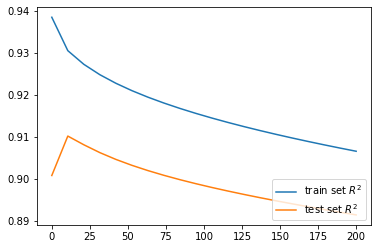

In [740]:
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

In [754]:
lasso=Lasso()
lasso.set_params(alpha=1, normalize=True)
lasso.fit(x_train,y_train)
print(lasso.intercept_)
print(lasso.score(x_test,y_test))

12.027930282233404
-0.001084747625501592
